# Anime Recommendation LTR EDA

## Fetch Dataset

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Download dataset
path = kagglehub.dataset_download("ransakaravihara/anime-recommendation-ltr-dataset")
print("Path to dataset files:", path)

# Load anime_info.csv
df = pd.read_csv(path + '/anime_info.csv')
df.head()


100%|██████████| 17.6M/17.6M [00:00<00:00, 104MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ransakaravihara/anime-recommendation-ltr-dataset/versions/5


,anime_id,Genres,is_tv,year_aired,is_adult,above_five_star_users,above_five_star_ratings,above_five_star_ratio
0,1,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",1,1998.0,1,4012.0,4012.0,0.594018
1,5,"Action, Drama, Mystery, Sci-Fi, Space",0,2001.0,1,NaN,NaN,NaN
2,6,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",1,1998.0,0,NaN,NaN,NaN
3,7,"Action, Mystery, Police, Supernatural, Drama, ...",1,2002.0,0,NaN,NaN,NaN
4,8,"Adventure, Fantasy, Shounen, Supernatural",1,2004.0,0,76.0,76.0,0.481013


In [2]:
df.columns

Index(['anime_id', 'Genres', 'is_tv', 'year_aired', 'is_adult',
       'above_five_star_users', 'above_five_star_ratings',
       'above_five_star_ratio'],
      dtype='object')

## Data Cleaning

In [3]:
# Check for nulls
print(df.isnull().sum())

# Fill or drop missing values
df['Genres'].fillna("Unknown", inplace=True)
df['year_aired'].fillna(df['year_aired'].mode()[0], inplace=True)


anime_id                       0
Genres                        54
is_tv                          0
year_aired                   123
is_adult                       0
above_five_star_users      11012
above_five_star_ratings    11012
above_five_star_ratio      11012
dtype: int64


/tmp/ipython-input-3-2773144792.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genres'].fillna("Unknown", inplace=True)
/tmp/ipython-input-3-2773144792.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## Exploratory Data Analysis (EDA)

### Anime Types (TV vs Non-TV)

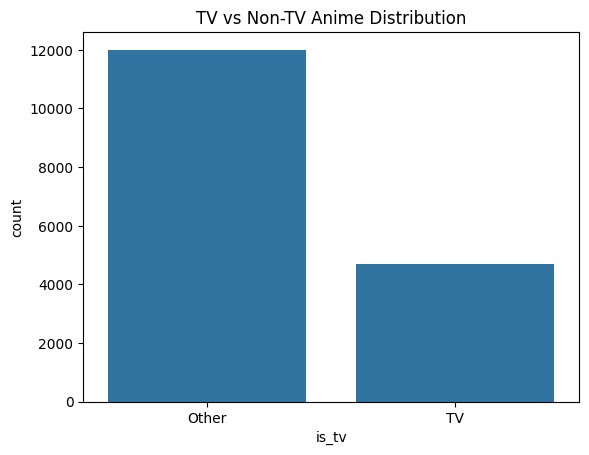

In [4]:
sns.countplot(x='is_tv', data=df)
plt.title("TV vs Non-TV Anime Distribution")
plt.xticks([0, 1], ['Other', 'TV'])
plt.show()


### Year-wise Anime Count

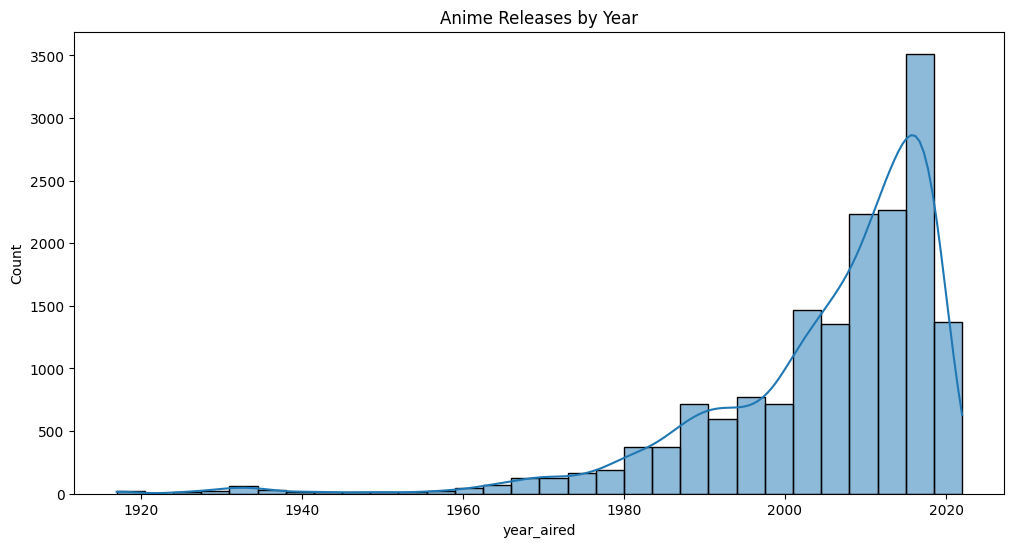

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='year_aired', bins=30, kde=True)
plt.title("Anime Releases by Year")
plt.show()


### Adult vs General Anime

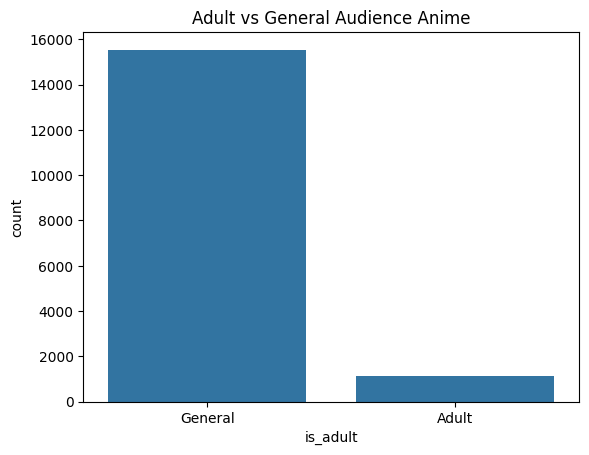

In [6]:
sns.countplot(x='is_adult', data=df)
plt.xticks([0,1], ['General', 'Adult'])
plt.title("Adult vs General Audience Anime")
plt.show()


### Above 5-Star Rating Ratio Distribution

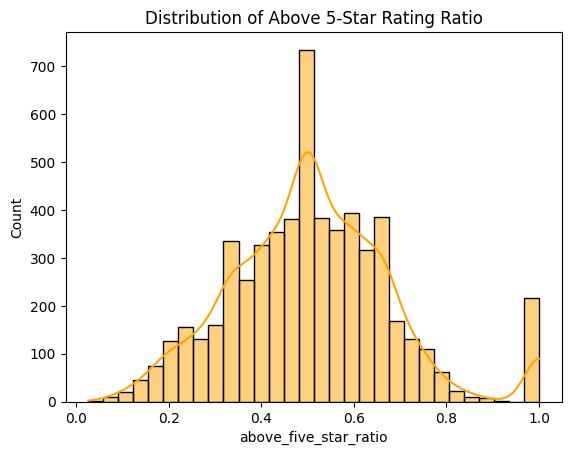

In [7]:
sns.histplot(df['above_five_star_ratio'], bins=30, kde=True, color='orange')
plt.title("Distribution of Above 5-Star Rating Ratio")
plt.show()


### Top Genres (Exploded)

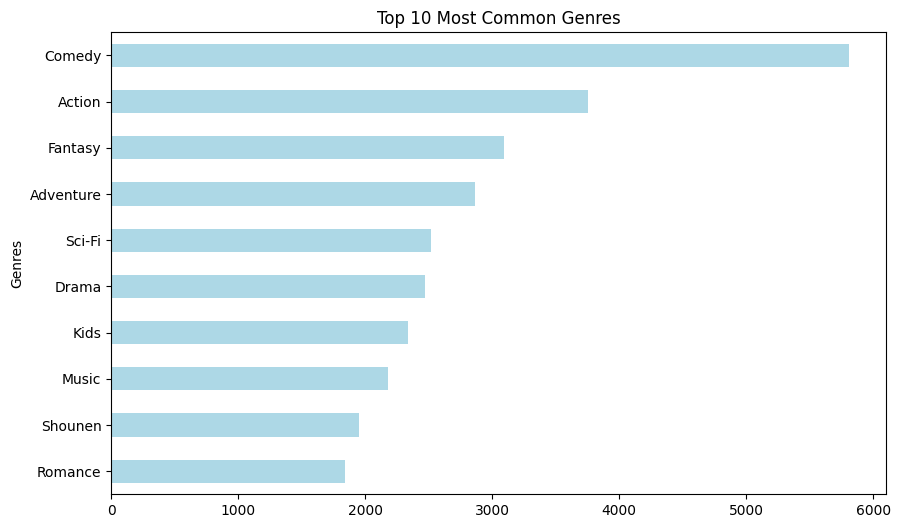

In [8]:
genre_series = df['Genres'].str.split(',').explode().str.strip()
top_genres = genre_series.value_counts().head(10)

plt.figure(figsize=(10,6))
top_genres.plot(kind='barh', color='lightblue')
plt.title("Top 10 Most Common Genres")
plt.gca().invert_yaxis()
plt.show()


## Feature Engineering

### Genre Count

In [9]:
df['genre_count'] = df['Genres'].apply(lambda x: len(x.split(',')) if x != "Unknown" else 0)


### Create Popularity Metric (normalized)

In [10]:
# Normalize above_five_star_users
df['popularity_score'] = df['above_five_star_users'] / df['above_five_star_users'].max()


### Create Decade Feature

In [11]:
df['decade'] = (df['year_aired'] // 10) * 10


### Encode is_tv and is_adult as categorical names

In [12]:
df['anime_type'] = df['is_tv'].map({1: 'TV', 0: 'Other'})
df['audience'] = df['is_adult'].map({1: 'Adult', 0: 'General'})


## Final Dataset for Modeling

In [13]:
final_df = df[[
    'anime_id', 'year_aired', 'genre_count', 'popularity_score',
    'above_five_star_ratio', 'decade', 'anime_type', 'audience'
]]

final_df.head()


,anime_id,year_aired,genre_count,popularity_score,above_five_star_ratio,decade,anime_type,audience
0,1,1998.0,6,0.485832,0.594018,1990.0,TV,Adult
1,5,2001.0,5,NaN,NaN,2000.0,Other,Adult
2,6,1998.0,6,NaN,NaN,1990.0,TV,General
3,7,2002.0,6,NaN,NaN,2000.0,TV,General
4,8,2004.0,4,0.009203,0.481013,2000.0,TV,General


# THANK YOU!